In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
"""
Vamos a centrar nuestro análisis desde dos puntos de vista diferentes:
En primer lugar, compararemos los datos estadísticos de su equipo con los del actual campeón de liga. 
Posteriormente, compararemos los datos estadísticos de su equipo con los del resto de la liga"""

"""

In [4]:
# Importamos nuestro archivo de ánalisis.

nba2019=pd.read_csv("./output/basket_analysis.csv")

In [5]:
# Vamos a echar un simple vistazo a la tabla de datos que tenemos.

display(nba2019)

,League,Season,Stage,Player,Team,GP,MIN,2PM,2PA,3PM,...,1PA,TOV,PF,ORB,DRB,REB,AST,STL,BLK,PTS
0,NBA,2018 - 2019,Regular_Season,LeBron James,Lakers,55,1937.4,558,1095,111,...,418,197,94,57,408,465,454,72,33,1505
1,NBA,2018 - 2019,Regular_Season,Kyle Kuzma,Lakers,70,2313.6,496,1087,128,...,250,133,170,60,322,382,178,41,26,1308
2,NBA,2018 - 2019,Regular_Season,Brandon Ingram,Lakers,52,1760.5,362,729,31,...,289,129,149,41,226,267,154,28,31,950
3,NBA,2018 - 2019,Regular_Season,Kentavious Caldwell-Pope,Lakers,82,2035.0,325,756,151,...,158,65,137,48,190,238,110,73,13,938
4,NBA,2018 - 2019,Regular_Season,JaVale McGee,Lakers,75,1670.8,400,641,1,...,152,108,208,195,371,566,52,47,148,897
5,NBA,2018 - 2019,Regular_Season,Reggie Bullock,Lakers,63,1878.9,245,594,148,...,85,65,109,22,151,173,129,40,12,711
6,NBA,2018 - 2019,Regular_Season,Josh Hart,Lakers,67,1714.8,189,464,92,...,80,58,147,35,213,248,93,64,40,525
7,NBA,2018 - 2019,Regular_Season,Lance Stephenson,Lakers,68,1122.7,184,432,73,...,73,86,111,32,183,215,140,41,7,491
8,NBA,2018 - 2019,Regular_Season,Lonzo Ball,Lakers,47,1422.6,185,456,75,...,48,103,114,54,197,251,255,69,19,465
9,NBA,2018 - 2019,Regular_Season,Mike Muscala,Lakers,64,1305.9,145,361,89,...,85,48,130,57,187,244,76,22,38,449


,PTS
Team,
Lakers,102.59
Toronto Raptors,113.09


<AxesSubplot:ylabel='PTS'>

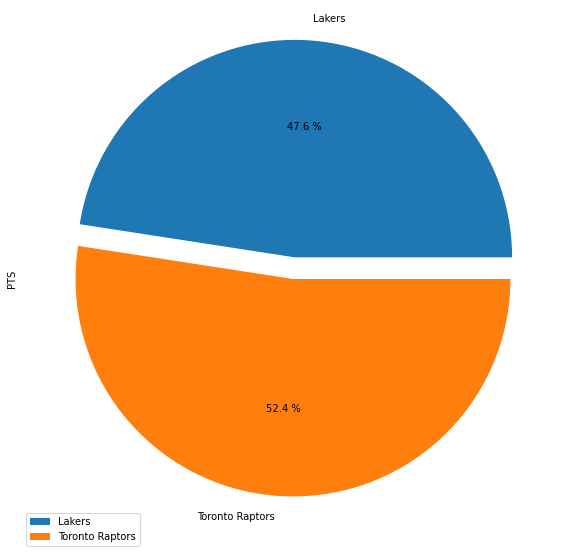

In [7]:
"""
Vamos a comenzar comparando el total de puntos por partido de cada equipo.
Para ello, vamos a tener en cuenta que en la liga regular se juegan un total de 82 partidos.
Aquí ya podemos comprobar que Toronto tiene una media mayor a la de su equipo de más de 10 puntos por partido.

"""

total_points=nba2019.groupby(["Team"]).agg({"PTS":"sum"})
total_points["PTS"]=total_points["PTS"].apply(lambda x:round(x/82,2))
total_points.reset_index()
display(total_points)
desfase = (0.1,0)
total_points.plot.pie(y='PTS', autopct="%0.1f %%", explode=desfase, figsize=(10,10))

,perc_accuracy_2
Team,
Lakers,0.469169
Toronto Raptors,0.504915


Text(0.5, 1.0, '2 point accuracy')

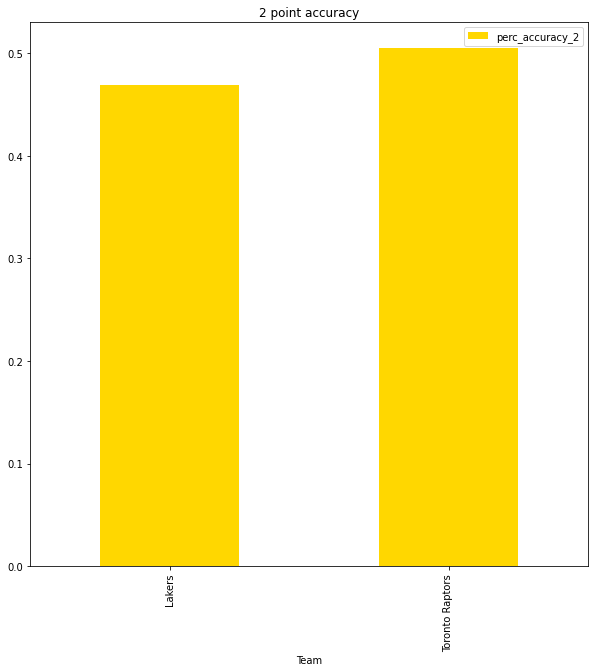

In [57]:
"""
Vamos a comparar ahora el porcentaje de acierto de sus jugadores en tiros de campo (2 puntos).
Vemos aquí que su equipo tiene un porcentaje de acierto inferior en 4 puntos al de Toronto.
Importante destacar aquí que la media de acierto en tiros de campo por jugador es de 0,47. 
La suma de los aciertos de sus jugadores se encuentra por debajo de dicha media, es importante mejorar
en este aspecto, pero mas adelante lo analizaremos con mayor detenimiento

"""

pm2=nba2019.groupby(["Team"]).agg({"2PM":"sum"})
pm2.reset_index()
pa2=nba2019.groupby(["Team"]).agg({"2PA":"sum"})
pa2.reset_index()
pm2["2PM"]=pm2["2PM"].apply(lambda x: x/pa2["2PA"])
pm2.columns=["perc_accuracy_2"]
perc_accuracy_2=pm2
display(perc_accuracy_2)
desfase = (0.1,0)
perc_accuracy_2.plot.bar(figsize=(10,10), color="gold")
plt.title("2 point accuracy")

,perc_accuracy_3
Team,
Lakers,0.340659
Toronto Raptors,0.377416


Text(0.5, 1.0, '3 point accuracy')

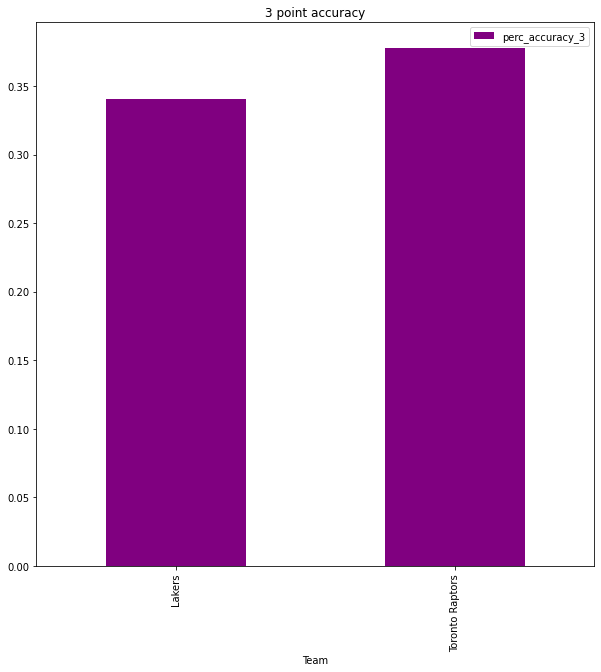

In [56]:
"""
Vamos a comparar ahora el porcentaje de acierto de sus jugadores en lanzamientos de triples.
Vemos que su equipo también tiene un porcentaje de acierto inferior a Toronto, en este caso de casi 4 puntos.
Importante destacar aquí que la media de acierto en lanzamientos de triples por jugador es de 0,32. 
La suma de los aciertos de sus jugadores se encuentra por encima de dicha media, en 2 puntos, sin embargo
Toronto se encuentra por encima de dicha media en casi 6 puntos.
Al igual que en el punto anterior, lo analizaremos con mayor detenimiento más adelante.

"""

pm3=nba2019.groupby(["Team"]).agg({"3PM":"sum"})
pm3.reset_index()
pa3=nba2019.groupby(["Team"]).agg({"3PA":"sum"})
pa3.reset_index()
pm3["3PM"]=pm3["3PM"].apply(lambda x: x/pa3["3PA"])
pm3.columns=["perc_accuracy_3"]
perc_accuracy_3=pm3
display(perc_accuracy_3)
desfase = (0.1,0)
perc_accuracy_3.plot.bar(figsize=(10,10), color="purple")
plt.title("3 point accuracy")

,perc_accuracy_1
Team,
Lakers,0.703188
Toronto Raptors,0.867826


Text(0.5, 1.0, '1 point accuracy')

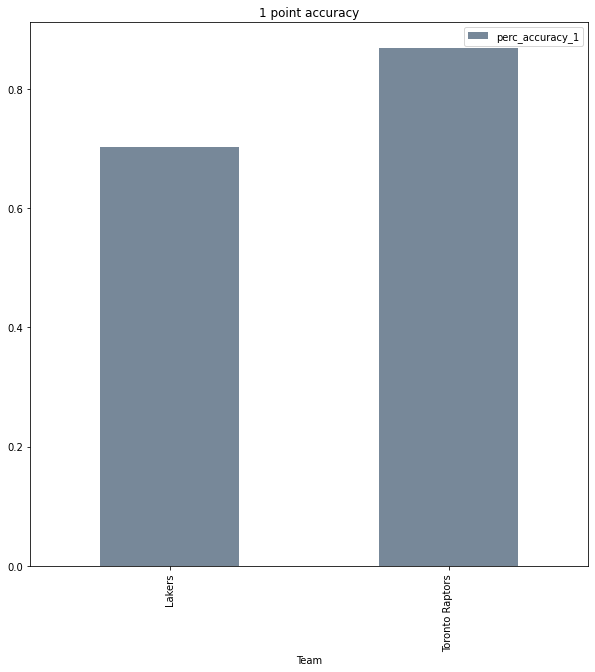

In [55]:
"""
Vamos a comparar ahora el porcentaje de acierto de sus jugadores en tiros libres.
Vemos aquí que su equipo tiene un porcentaje de acierto inferior en 16 puntos al de Toronto.
La media de acierto en tiros libres por jugador es de 0,74 en este caso. 
La suma de los aciertos de sus jugadores se encuentra 4 puntos por debajo de dicha media.
Al igual que en los dos puntos anteriores, analizaremos esto con mayor detenimiento

"""

pm1=nba2019.groupby(["Team"]).agg({"1PM":"sum"})
pm1.reset_index()
pa1=nba2019.groupby(["Team"]).agg({"1PA":"sum"})
pa1.reset_index()
pm1["1PM"]=pm1["1PM"].apply(lambda x: x/pa1["1PA"])
pm1.columns=["perc_accuracy_1"]
perc_accuracy_1=pm1
display(perc_accuracy_1)
perc_accuracy_1.plot.bar(figsize=(10,10), color="lightslategray")
plt.title("1 point accuracy")

,TOV
Team,
Lakers,1034
Toronto Raptors,1127


<AxesSubplot:ylabel='TOV'>

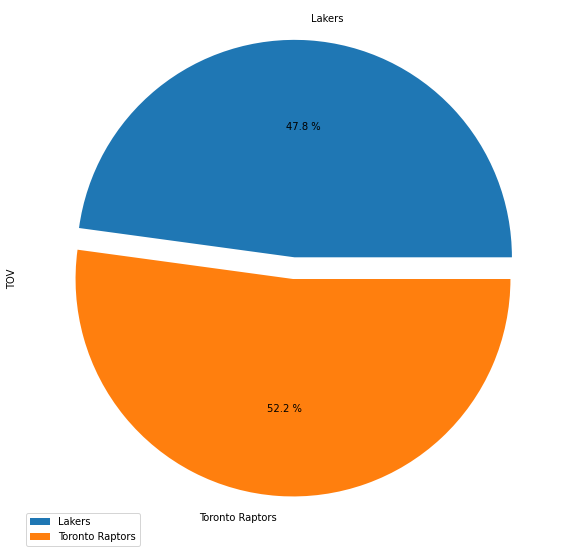

In [11]:
"""
Comparamos ahora el porcentaje de perdidas de balón de sus jugadores.
En este caso, su equipo tiene menores perdidas que Toronto, este es un dato positivo.
Veremos en el siguiente análisis, en que punto nos encontramos con respecto al resto de equipo de la liga.

"""

turnovers=nba2019.groupby(["Team"]).agg({"TOV":"sum"})
display(turnovers)
desfase=(0.1,0)
turnovers.plot.pie(y="TOV", autopct="%0.1f %%", explode=desfase, figsize=(10,10))

,ORB
Team,
Lakers,693
Toronto Raptors,656


<AxesSubplot:ylabel='ORB'>

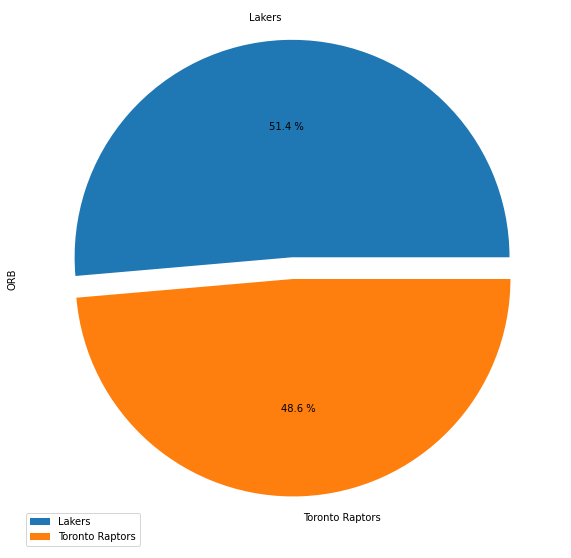

In [12]:
"""
En relación a los rebotes ofensivos de sus jugadores.
En este caso, su equipo consigue mayores rebotes ofensivos que Toronto, este es otro dato positivo.
Esto nos indica que su equipo tiene mejor actitud ofensiva que Toronto.
Veremos en el siguiente análisis, en que punto nos encontramos con respecto al resto de equipo de la liga.

"""

offensive_rebounds=nba2019.groupby(["Team"]).agg({"ORB":"sum"})
display(offensive_rebounds)
desfase=(0.1,0)
offensive_rebounds.plot.pie(y="ORB", autopct="%0.1f %%", explode=desfase, figsize=(10,10))

,DRB
Team,
Lakers,2663
Toronto Raptors,2871


<AxesSubplot:ylabel='DRB'>

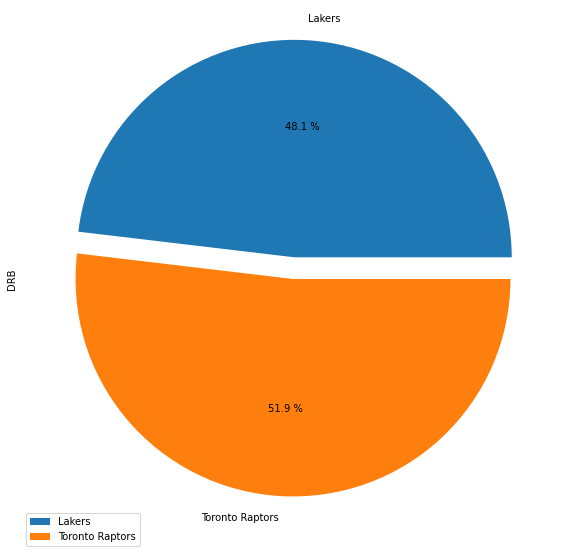

In [13]:
"""
Pasamos a ver ahora el ánalisis de los rebotes defensivos de sus jugadores.
En este caso, su equipo consigue menores rebotes defensivos que Toronto.
Esto quiere decir que su equipo tiene peor actitud defensiva que Toronto.
Veremos en el siguiente análisis, en que punto nos encontramos con respecto al resto de equipo de la liga.

"""

defensive_rebounds=nba2019.groupby(["Team"]).agg({"DRB":"sum"})
display(defensive_rebounds)
desfase=(0.1,0)
defensive_rebounds.plot.pie(y="DRB", autopct="%0.1f %%", explode=desfase, figsize=(10,10))

,AST
Team,
Lakers,1678
Toronto Raptors,2261


<AxesSubplot:ylabel='AST'>

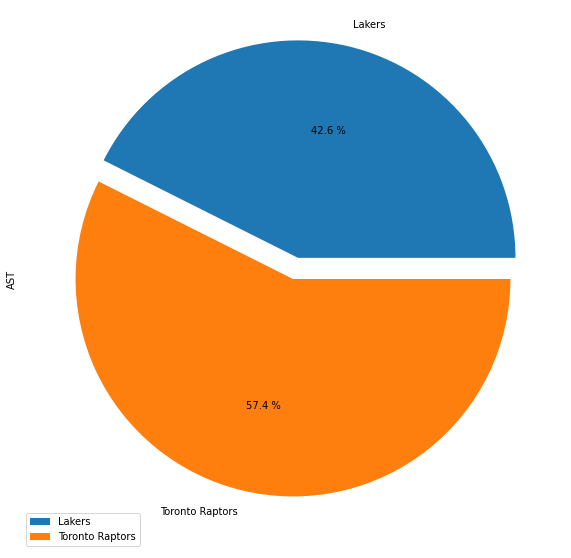

In [14]:
"""
Vemos ahora el ánalisis de asistencias de sus jugadores.
En este caso, su equipo tiene un número de asistencias muy inferior al de Toronto.
Esto quiere decir que su equipo tiene un juego mucho más individualista que el de Toronto, este dato
puede tener una gran relación con la estadística de pérdidas de balón.
En el siguiente análisis, veremos en que punto nos encontramos con respecto al resto de equipo de la liga.

"""

assists=nba2019.groupby(["Team"]).agg({"AST":"sum"})
display(assists)
desfase=(0.1,0)
assists.plot.pie(y="AST", autopct="%0.1f %%", explode=desfase, figsize=(10,10))

,Player,AST,Team
15,Kyle Lowry,564,Toronto Raptors
0,LeBron James,454,Lakers
14,Marc Gasol,349,Toronto Raptors
18,Fred VanVleet,307,Toronto Raptors
8,Lonzo Ball,255,Lakers
12,Pascal Siakam,248,Toronto Raptors
17,Jeremy Lin,231,Toronto Raptors
11,Kawhi Leonard,199,Toronto Raptors
1,Kyle Kuzma,178,Lakers
2,Brandon Ingram,154,Lakers


Text(0, 0.5, 'Nº Assists')

<Figure size 432x288 with 0 Axes>

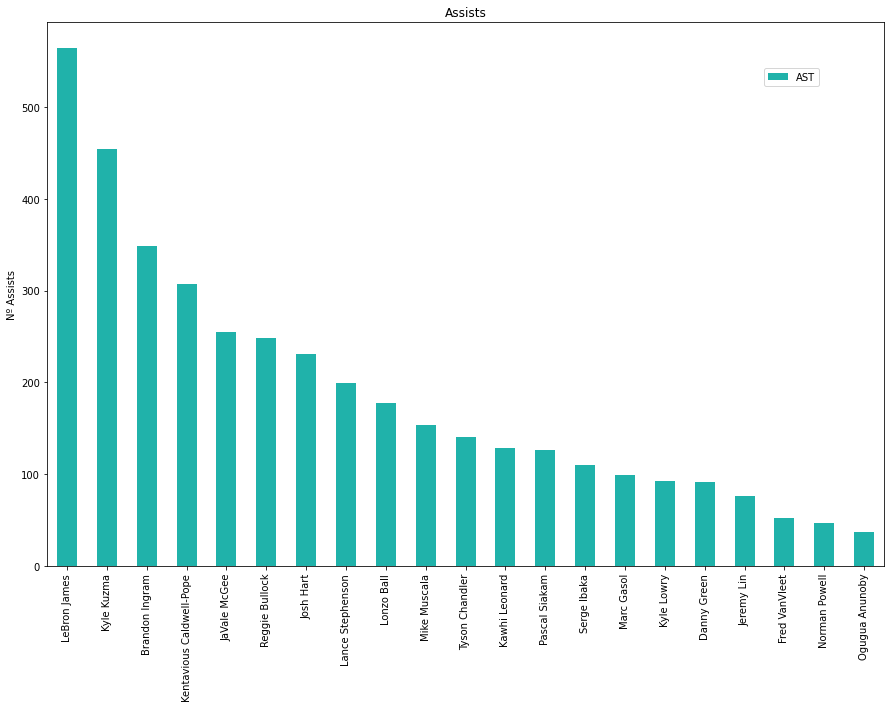

In [42]:
"""
Pasamos ahora a analizar los datos de los 10 jugadores con mayor nº de asistencias.
De nuestro anterior análisis ya podemos deducir que Toronto va a tener más jugadores,
y efectivamente así es, 6 vs 4.

"""

best_assists=nba2019[["Player","AST","Team"]]
best_assists1=best_assists.sort_values(by="AST", ascending=False)
display(best_assists1.head(10))
plt.figure()
ax = best_assists1.plot(kind='bar', figsize=(15,10), color="lightseagreen")
ax.set_xticklabels(best_assists.Player, rotation=90)
ax.legend(loc='center left', bbox_to_anchor=(0.85, 0.9))
plt.title("Assists")
plt.ylabel("Nº Assists")

In [16]:
"""
Vamos a incluir en nuestra tabla, los porcentajes de precisión en tiros libres, tiros de campo y triples
para continuar con un análisis mas exhaustivo de nuestros jugadores.

""" 

nba2019["%1PACC"]=round(nba2019["1PM"]/nba2019["1PA"],2)
nba2019["%2PACC"]=round(nba2019["2PM"]/nba2019["2PA"],2)
nba2019["%3PACC"]=round(nba2019["3PM"]/nba2019["3PA"],2)
display(nba2019)

,League,Season,Stage,Player,Team,GP,MIN,2PM,2PA,3PM,...,ORB,DRB,REB,AST,STL,BLK,PTS,%1PACC,%2PACC,%3PACC
0,NBA,2018 - 2019,Regular_Season,LeBron James,Lakers,55,1937.4,558,1095,111,...,57,408,465,454,72,33,1505,0.67,0.51,0.34
1,NBA,2018 - 2019,Regular_Season,Kyle Kuzma,Lakers,70,2313.6,496,1087,128,...,60,322,382,178,41,26,1308,0.75,0.46,0.30
2,NBA,2018 - 2019,Regular_Season,Brandon Ingram,Lakers,52,1760.5,362,729,31,...,41,226,267,154,28,31,950,0.67,0.50,0.33
3,NBA,2018 - 2019,Regular_Season,Kentavious Caldwell-Pope,Lakers,82,2035.0,325,756,151,...,48,190,238,110,73,13,938,0.87,0.43,0.35
4,NBA,2018 - 2019,Regular_Season,JaVale McGee,Lakers,75,1670.8,400,641,1,...,195,371,566,52,47,148,897,0.63,0.62,0.08
5,NBA,2018 - 2019,Regular_Season,Reggie Bullock,Lakers,63,1878.9,245,594,148,...,22,151,173,129,40,12,711,0.86,0.41,0.38
6,NBA,2018 - 2019,Regular_Season,Josh Hart,Lakers,67,1714.8,189,464,92,...,35,213,248,93,64,40,525,0.69,0.41,0.34
7,NBA,2018 - 2019,Regular_Season,Lance Stephenson,Lakers,68,1122.7,184,432,73,...,32,183,215,140,41,7,491,0.68,0.43,0.37
8,NBA,2018 - 2019,Regular_Season,Lonzo Ball,Lakers,47,1422.6,185,456,75,...,54,197,251,255,69,19,465,0.42,0.41,0.33
9,NBA,2018 - 2019,Regular_Season,Mike Muscala,Lakers,64,1305.9,145,361,89,...,57,187,244,76,22,38,449,0.82,0.40,0.35


,Player,%1PACC,Team,MIN
3,Kentavious Caldwell-Pope,0.87,Lakers,2035.0
5,Reggie Bullock,0.86,Lakers,1878.9
11,Kawhi Leonard,0.85,Toronto Raptors,2040.2
17,Jeremy Lin,0.84,Toronto Raptors,1436.3
16,Danny Green,0.84,Toronto Raptors,2215.5
18,Fred VanVleet,0.84,Toronto Raptors,1760.2
19,Norman Powell,0.83,Toronto Raptors,1126.4
15,Kyle Lowry,0.83,Toronto Raptors,2213.4
9,Mike Muscala,0.82,Lakers,1305.9
12,Pascal Siakam,0.78,Toronto Raptors,2547.7


Text(0, 0.5, 'Free Throws Accuracy')

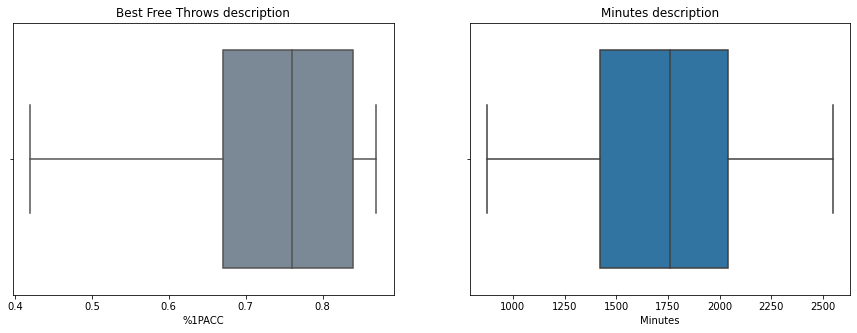

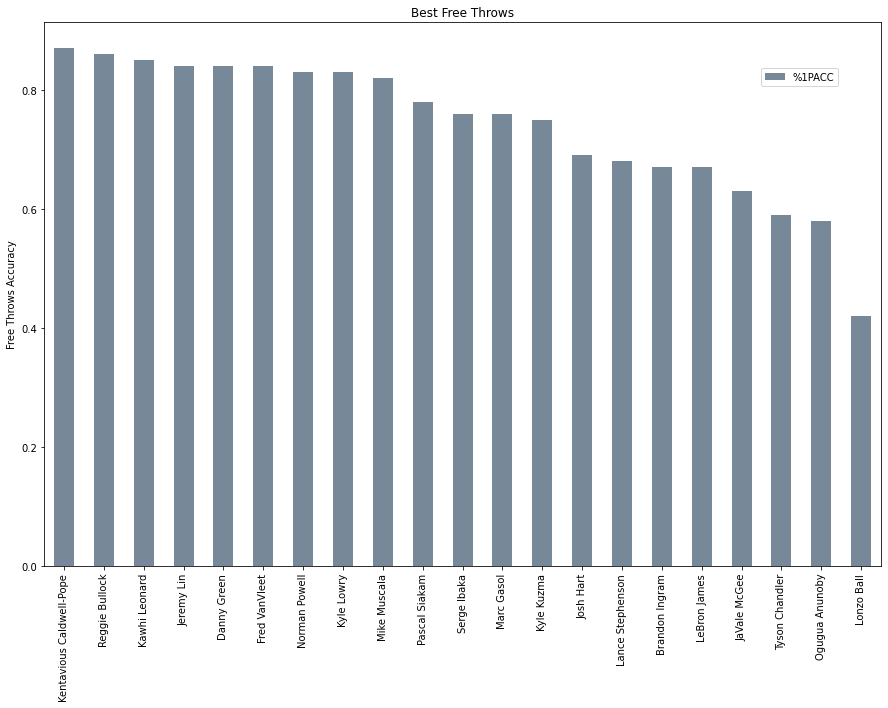

In [50]:
"""
Comenzamos con el acierto en tiros libres, vemos que Toronto es muy dominador en este aspecto.
Además vemos que 7 de los 11 jugadores están por debajo de la media de 0,74.
Es muy importante que el equipo mejore en este aspecto.

""" 

best_free_throws_player=nba2019[["Player","%1PACC","Team","MIN"]]
best_free_throws_player1=best_free_throws_player.sort_values(by="%1PACC", ascending=False)
display(best_free_throws_player1)
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
box_1PACC=sns.boxplot([nba2019["%1PACC"]],color="lightslategray")
plt.title("Best Free Throws description")
plt.xlabel("%1PACC")
plt.subplot(1,2,2)
box_mins=sns.boxplot([nba2019["MIN"]])
plt.title("Minutes description")
plt.xlabel("Minutes")
plt.figure()
ax = best_free_throws_player1["%1PACC"].plot(kind='bar', figsize=(15,10), color="lightslategray")
ax.set_xticklabels(best_free_throws_player1.Player, rotation=90)
ax.legend(loc='center left', bbox_to_anchor=(0.85, 0.9))
plt.title("Best Free Throws")
plt.ylabel("Free Throws Accuracy")


,Player,%2PACC,Team,MIN
10,Tyson Chandler,0.62,Lakers,874.9
4,JaVale McGee,0.62,Lakers,1670.8
12,Pascal Siakam,0.55,Toronto Raptors,2547.7
13,Serge Ibaka,0.53,Toronto Raptors,2010.5
0,LeBron James,0.51,Lakers,1937.4
11,Kawhi Leonard,0.50,Toronto Raptors,2040.2
2,Brandon Ingram,0.50,Lakers,1760.5
19,Norman Powell,0.48,Toronto Raptors,1126.4
16,Danny Green,0.47,Toronto Raptors,2215.5
1,Kyle Kuzma,0.46,Lakers,2313.6


Text(0, 0.5, '2P Accuracy')

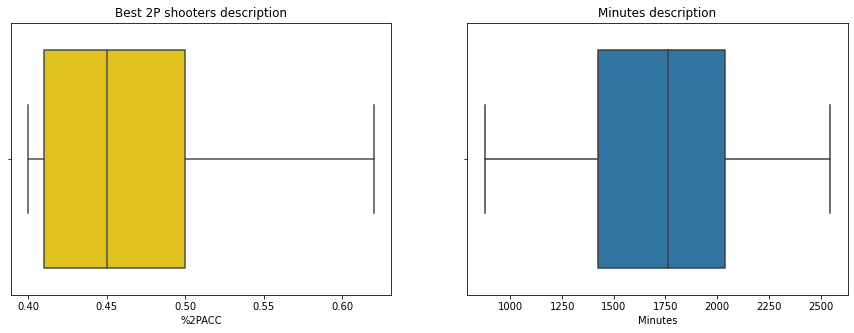

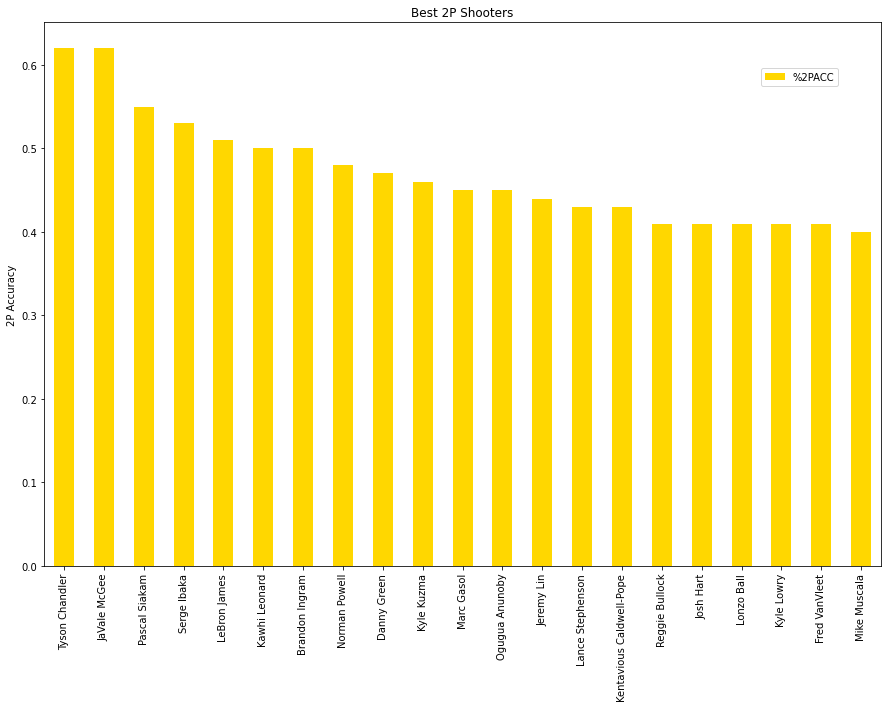

In [48]:
"""
Vamos ahora con el acierto en tiros de campo, vemos que a pesar de colocar 2 jugadores en lo alto de la tabla,
este dato no refleja el dominio de Toronto en este aspecto. Si observamos bien, los 2 primeros jugadores,
son el último y 7º jugador con más minutos jugados respectivamente en el equipo, mientras que los 
primeros jugadores de Toronto que aparecen en la tabla son de los que más minutos disputan.
Además vemos que de nuevo 7 de los 11 jugadores están por debajo de la media de 0,47.
Es tremendamente importante que el equipo mejore en este aspecto.

"""

best_2p_shooters=nba2019[["Player","%2PACC","Team","MIN"]]
best_2p_shooters1=best_2p_shooters.sort_values(by="%2PACC", ascending=False)
display(best_2p_shooters1)
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
box_2PACC=sns.boxplot([nba2019["%2PACC"]],color="gold")
plt.title("Best 2P shooters description")
plt.xlabel("%2PACC")
plt.subplot(1,2,2)
box_mins=sns.boxplot([nba2019["MIN"]])
plt.title("Minutes description")
plt.xlabel("Minutes")
plt.figure()
ax=best_2p_shooters1["%2PACC"].plot(kind='bar', figsize=(15,10), color="gold")
ax.set_xticklabels(best_2p_shooters1.Player, rotation=90)
ax.legend(loc='center left', bbox_to_anchor=(0.85, 0.9))
plt.title("Best 2P Shooters")
plt.ylabel("2P Accuracy")

,Player,%3PACC,Team,MIN
16,Danny Green,0.46,Toronto Raptors,2215.5
19,Norman Powell,0.40,Toronto Raptors,1126.4
18,Fred VanVleet,0.38,Toronto Raptors,1760.2
5,Reggie Bullock,0.38,Lakers,1878.9
7,Lance Stephenson,0.37,Lakers,1122.7
11,Kawhi Leonard,0.37,Toronto Raptors,2040.2
12,Pascal Siakam,0.37,Toronto Raptors,2547.7
14,Marc Gasol,0.36,Toronto Raptors,2436.1
3,Kentavious Caldwell-Pope,0.35,Lakers,2035.0
9,Mike Muscala,0.35,Lakers,1305.9


Text(0, 0.5, '3P Accuracy')

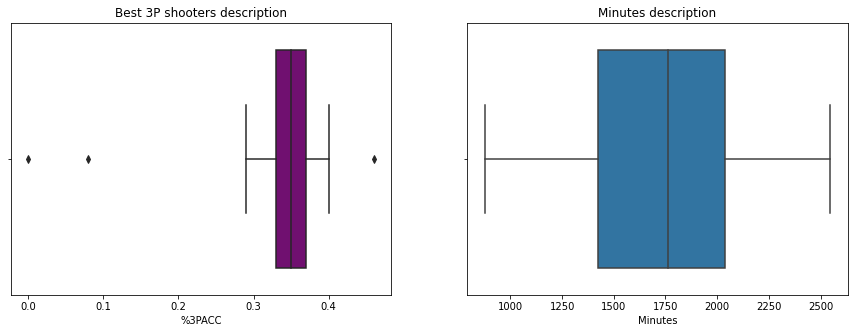

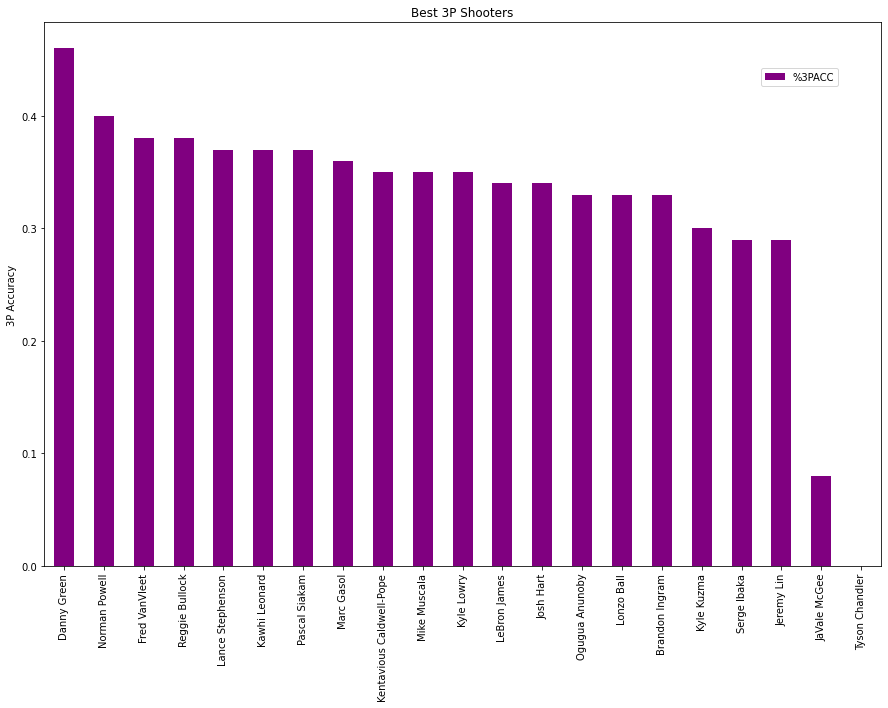

In [47]:
"""
Finalmente vamos ahora con el acierto en lanzamientos de triples, vemos que Toronto vuelve a dominar
esta estadística.
En este caso, el equipo no se encuentra en tan mala posición como en las anteriores, con 3 jugadores por
debajo de la media de 0,32, el resto se encuentran por encima.

"""

best_3p_shooters=nba2019[["Player","%3PACC","Team","MIN"]]
best_3p_shooters1=best_3p_shooters.sort_values(by="%3PACC", ascending=False)
display(best_3p_shooters1)
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
box_3PACC=sns.boxplot([nba2019["%3PACC"]], color="purple")
plt.title("Best 3P shooters description")
plt.xlabel("%3PACC")
plt.subplot(1,2,2)
box_mins=sns.boxplot([nba2019["MIN"]])
plt.title("Minutes description")
plt.xlabel("Minutes")
plt.figure()
ax=best_3p_shooters1["%3PACC"].plot(kind='bar',colormap="Paired", figsize=(15,10), color="purple")
ax.set_xticklabels(best_3p_shooters1.Player, rotation=90)
ax.legend(loc='center left', bbox_to_anchor=(0.85, 0.9))
plt.title("Best 3P Shooters")
plt.ylabel("3P Accuracy")

In [20]:
"""
Vemos la descripción estadística de nuestra tabla, esta es la tabla que hemos empleado para comparar 
la media en cada uno de los puntos anteriores.

"""

nba2019.describe().T

,count,mean,std,min,25%,50%,75%,max
GP,21.0,66.714286,9.813984,47.00,60.00,67.00,74.00,82.00
MIN,21.0,1770.271429,460.946622,874.90,1422.60,1760.50,2040.20,2547.70
2PM,21.0,311.428571,145.327070,61.00,189.00,293.00,400.00,560.00
2PA,21.0,659.476190,271.734543,99.00,456.00,630.00,870.00,1129.00
3PM,21.0,90.238095,50.115771,0.00,67.00,89.00,112.00,198.00
3PA,21.0,254.285714,130.000055,1.00,187.00,256.00,327.00,453.00
1PM,21.0,129.047619,90.620901,20.00,55.00,97.00,188.00,364.00
1PA,21.0,170.619048,115.741296,44.00,80.00,152.00,250.00,426.00
TOV,21.0,102.904762,44.603705,42.00,65.00,103.00,129.00,197.00
PF,21.0,145.809524,44.168562,87.00,110.00,140.00,170.00,241.00
